In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv('milanuncios.csv')
df

,name,location,link,precio,metros_cuadrados,n_dormitorios,n_baños
0,- . REF: 437-00038P. LA PROPIEDAD \n \n,manilva,/alquiler-de-apartamentos-en-manilva-malaga/-3...,900,140m,3 dorm.,2 baños
1,SANCHINARRO - CORTE INGLES,Madrid,/alquiler-de-pisos-en-madrid-madrid/sanchinarr...,1020,85m,1 dorm.,1 baños
2,BAILÉN - MIRAFLORES,malaga,/alquiler-de-pisos-en-malaga-malaga/bailen-mir...,690,70m,3 dorm.,1 baños
3,ZONA PLAZA XÚQUER,paiporta,/alquiler-de-pisos-en-paiporta-valencia/zona-p...,625,80m,3 dorm.,2 baños
4,SANTA MARÍA DE GETXO,getxo,/alquiler-de-aticos-en-getxo-vizcaya/santa-mar...,900,72m,2 dorm.,1 baños
...,...,...,...,...,...,...,...
4517,ZONA UNIVERSIDAD,Ciudad Real,/alquiler-de-apartamentos-en-ciudad-real-ciuda...,250,60m,1 dorm.,1 baños
4518,ATICO DUPLEXSAN BLAS SANTO DOMINGO - CUENCA,Alicante/Alacant,/alquiler-de-aticos-en-alicante|alacant-alican...,850,130m,4 dorm.,2 baños
4519,LOS BOLICHES - FRANCISCO CANO,Fuengirola,/alquiler-de-pisos-en-fuengirola-malaga/los-bo...,750,105m,3 dorm.,2 baños
4520,PISO ALQUILER ALCASSER,Alcasser/Alcacer,/alquiler-de-pisos-en-alcasser|alcacer-valenci...,500,150m,4 dorm.,2 baños


In [3]:
df.dtypes

name                object
location            object
link                object
precio               int64
metros_cuadrados    object
n_dormitorios       object
n_baños             object
dtype: object

Vamos a eliminar las unidades de los datos extraidos para poder tratarlos como números:

In [4]:
df['metros_cuadrados'] = df['metros_cuadrados'].str.replace('m', '')
df['n_dormitorios'] = df['n_dormitorios'].str.replace('dorm.', '')
df['n_baños'] = df['n_baños'].str.replace('baños', '')
df.head()

<ipython-input-4-ed4aa5cf5874>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['n_dormitorios'] = df['n_dormitorios'].str.replace('dorm.', '')


,name,location,link,precio,metros_cuadrados,n_dormitorios,n_baños
0,- . REF: 437-00038P. LA PROPIEDAD \n \n,manilva,/alquiler-de-apartamentos-en-manilva-malaga/-3...,900,140,3,2
1,SANCHINARRO - CORTE INGLES,Madrid,/alquiler-de-pisos-en-madrid-madrid/sanchinarr...,1020,85,1,1
2,BAILÉN - MIRAFLORES,malaga,/alquiler-de-pisos-en-malaga-malaga/bailen-mir...,690,70,3,1
3,ZONA PLAZA XÚQUER,paiporta,/alquiler-de-pisos-en-paiporta-valencia/zona-p...,625,80,3,2
4,SANTA MARÍA DE GETXO,getxo,/alquiler-de-aticos-en-getxo-vizcaya/santa-mar...,900,72,2,1


Los links extraidos son links parciales, desde la página dónde se han extraido, por ello añadimos el prefijo para convertirlo un link más práctico:

In [5]:
df['link'] = 'https://www.milanuncios.com/alquiler-de-pisos' + df['link']

Para dar uniformidad y evitar duplicados como 'madrid' y 'Madrid', pasamos el texto a todo mayúsculas

In [6]:
df['location'] = df['location'].str.upper()

In [7]:
df.head()

,name,location,link,precio,metros_cuadrados,n_dormitorios,n_baños
0,- . REF: 437-00038P. LA PROPIEDAD \n \n,MANILVA,https://www.milanuncios.com/alquiler-de-pisos/...,900,140,3,2
1,SANCHINARRO - CORTE INGLES,MADRID,https://www.milanuncios.com/alquiler-de-pisos/...,1020,85,1,1
2,BAILÉN - MIRAFLORES,MALAGA,https://www.milanuncios.com/alquiler-de-pisos/...,690,70,3,1
3,ZONA PLAZA XÚQUER,PAIPORTA,https://www.milanuncios.com/alquiler-de-pisos/...,625,80,3,2
4,SANTA MARÍA DE GETXO,GETXO,https://www.milanuncios.com/alquiler-de-pisos/...,900,72,2,1


A continuación extraemos los pisos con información incompleta, como no son muchos, los eliminaremos directamente.

In [8]:
df[df.isna().any(axis=1)]

,name,location,link,precio,metros_cuadrados,n_dormitorios,n_baños
36,RETIRO - CALLE NARVÁEZ 52,MADRID,https://www.milanuncios.com/alquiler-de-pisos/...,800,35,NaN,1
38,CENTRO DE VALDEMORO - CALLE SAN NICOLÁS 5,VALDEMORO,https://www.milanuncios.com/alquiler-de-pisos/...,550,40,NaN,1
41,CENTRO DE MADRID - CALLE LIBREROS 10,MADRID,https://www.milanuncios.com/alquiler-de-pisos/...,650,35,NaN,1
71,PISO DE 4 DORMITORIOS PARA JUNIO Y JULIO,GRANADA,https://www.milanuncios.com/alquiler-de-pisos/...,1000,NaN,NaN,NaN
72,"BUSCO UN PISO EN ALQUILER, MURCIA.",MURCIA,https://www.milanuncios.com/alquiler-de-pisos/...,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...
4495,1 LÍNEA DE PLAYA - ED MARBELLAMAR,MIJAS,https://www.milanuncios.com/alquiler-de-pisos/...,500,54,NaN,1
4496,1 LÍNEA DE PLAYA - ED MARBELLAMAR,MIJAS,https://www.milanuncios.com/alquiler-de-pisos/...,500,54,NaN,1
4504,ZONA CENTRO,CIUDAD REAL,https://www.milanuncios.com/alquiler-de-pisos/...,400,NaN,2,2
4509,CENTRO - CENTRO,VIGO,https://www.milanuncios.com/alquiler-de-pisos/...,500,35,NaN,1


In [9]:
df.dropna(inplace=True)

In [10]:
df

,name,location,link,precio,metros_cuadrados,n_dormitorios,n_baños
0,- . REF: 437-00038P. LA PROPIEDAD \n \n,MANILVA,https://www.milanuncios.com/alquiler-de-pisos/...,900,140,3,2
1,SANCHINARRO - CORTE INGLES,MADRID,https://www.milanuncios.com/alquiler-de-pisos/...,1020,85,1,1
2,BAILÉN - MIRAFLORES,MALAGA,https://www.milanuncios.com/alquiler-de-pisos/...,690,70,3,1
3,ZONA PLAZA XÚQUER,PAIPORTA,https://www.milanuncios.com/alquiler-de-pisos/...,625,80,3,2
4,SANTA MARÍA DE GETXO,GETXO,https://www.milanuncios.com/alquiler-de-pisos/...,900,72,2,1
...,...,...,...,...,...,...,...
4516,ZONA UNIVERSIDAD,CIUDAD REAL,https://www.milanuncios.com/alquiler-de-pisos/...,400,70,2,1
4517,ZONA UNIVERSIDAD,CIUDAD REAL,https://www.milanuncios.com/alquiler-de-pisos/...,250,60,1,1
4518,ATICO DUPLEXSAN BLAS SANTO DOMINGO - CUENCA,ALICANTE/ALACANT,https://www.milanuncios.com/alquiler-de-pisos/...,850,130,4,2
4519,LOS BOLICHES - FRANCISCO CANO,FUENGIROLA,https://www.milanuncios.com/alquiler-de-pisos/...,750,105,3,2


Convertimos algunas de las columnas a formato de número:

In [11]:
df.metros_cuadrados = df.metros_cuadrados.astype(int)
df.n_dormitorios = df.n_dormitorios.astype(int)
df.n_baños = df.n_baños.astype(int)
df.dtypes

name                object
location            object
link                object
precio               int64
metros_cuadrados     int64
n_dormitorios        int64
n_baños              int64
dtype: object

Añadimos la métrica de €/metro_cuadrado

In [12]:
df['precio/metro2'] = df['precio'] / df['metros_cuadrados']
df.head()

,name,location,link,precio,metros_cuadrados,n_dormitorios,n_baños,precio/metro2
0,- . REF: 437-00038P. LA PROPIEDAD \n \n,MANILVA,https://www.milanuncios.com/alquiler-de-pisos/...,900,140,3,2,6.428571
1,SANCHINARRO - CORTE INGLES,MADRID,https://www.milanuncios.com/alquiler-de-pisos/...,1020,85,1,1,12.000000
2,BAILÉN - MIRAFLORES,MALAGA,https://www.milanuncios.com/alquiler-de-pisos/...,690,70,3,1,9.857143
3,ZONA PLAZA XÚQUER,PAIPORTA,https://www.milanuncios.com/alquiler-de-pisos/...,625,80,3,2,7.812500
4,SANTA MARÍA DE GETXO,GETXO,https://www.milanuncios.com/alquiler-de-pisos/...,900,72,2,1,12.500000


In [13]:
df.describe()

,precio,metros_cuadrados,n_dormitorios,n_baños,precio/metro2
count,4168.000000,4168.000000,4168.000000,4168.000000,4168.000000
mean,682.548944,82.871401,2.265355,1.380038,9.815071
std,2567.944714,64.365939,1.945040,0.554671,40.868485
min,1.000000,1.000000,1.000000,1.000000,0.000667
25%,450.000000,60.000000,1.000000,1.000000,6.000000
50%,575.000000,75.000000,2.000000,1.000000,7.911392
75%,750.000000,95.000000,3.000000,2.000000,10.000000
max,165000.000000,2000.000000,90.000000,6.000000,1853.932584


El máximo de precio es de 165K para alquiler, cosa que no tiene mucho sentido. Vamos a fijarnos en los precios más altos del dataset:

Al consultar el anuncio, comprobamos que se trata de una venta, no de un alquiler. Es decir, es un anuncio mal puesto, así que lo eliminamos del dataset:

Se agrupa por localización y se ordena por €/metro_cuadrado de menor a mayor, en el siguiente bloque nos fijamos en las 20 localizaciones más caras por metro cuadrado de españa para alquiler en milanuncios.

In [14]:
df_location = df.groupby(['location']).mean().sort_values('precio/metro2')
df_location

,precio,metros_cuadrados,n_dormitorios,n_baños,precio/metro2
location,,,,,
CHIPIONA,1.000000,80.000000,3.000000,2.000000,0.012500
VILA SECA DE SOLCINA/VILASECA,40.000000,60.000000,1.000000,1.000000,0.666667
CONIL DE LA FRONTERA,40.000000,55.000000,2.000000,1.000000,0.727273
BARRIADA FAÑABE,780.000000,999.000000,3.000000,2.000000,0.780781
GUADALUPE,200.000000,120.000000,4.000000,2.000000,1.666667
...,...,...,...,...,...
CÓRDOBA,563.623188,81.057971,2.304348,1.420290,20.046630
RIBADESELLA,3000.000000,80.000000,2.000000,1.000000,37.500000
SANTANDER,5182.361111,72.361111,1.972222,1.138889,60.252503


In [15]:
df_location.tail(20)

,precio,metros_cuadrados,n_dormitorios,n_baños,precio/metro2
location,,,,,
ARENALES DEL SOL,900.000000,65.000000,2.000000,2.000000,13.846154
IBIZA / EIVISSA,1395.000000,104.200000,3.200000,1.600000,13.895655
SANT CUGAT DEL VALLES,1190.000000,96.000000,4.000000,1.500000,14.004963
MADRID,944.045872,75.500000,2.013761,1.362385,14.031046
CALVIA,1006.666667,68.333333,1.333333,1.333333,14.066667
ALBORAYA,1100.000000,75.000000,2.000000,2.000000,14.666667
LA PLAYA,680.000000,46.000000,1.000000,1.000000,14.782609
PLAYA DE BURRERRO,1500.000000,100.000000,3.000000,2.000000,15.000000
BENASQUE,600.000000,40.000000,2.000000,1.000000,15.000000


A continuación se muestra la esperable tendencia de aumento de precio con los metros_cuadrados de la vivienda.
Además observamos que casi todos los pisos están por debajo de los 150 metros cuadrados 

<AxesSubplot:xlabel='metros_cuadrados', ylabel='precio'>

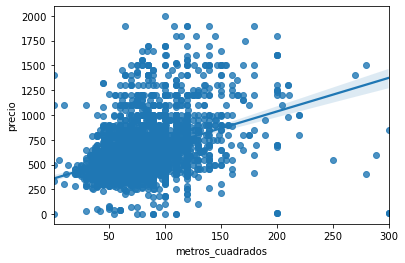

In [16]:
import seaborn as sns
sns.regplot(x='metros_cuadrados', y='precio', data=df[(df['precio']<2000)& (df['metros_cuadrados'] < 500)])
                                                      

Vamos a obtener la misma gráfica pero para el número de dormitorios y el número de baños.
También existe una correlación positiva entre el aumento de estas variables y el precio, sobretodo con el número de baños.

<AxesSubplot:xlabel='n_dormitorios', ylabel='precio'>

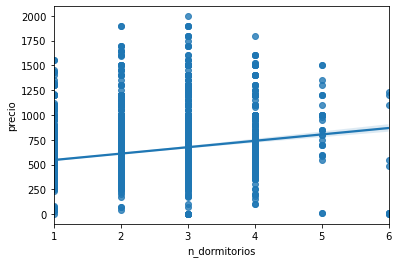

In [17]:
sns.regplot(x='n_dormitorios', y='precio', data=df[(df['precio']<2000)& (df['n_dormitorios'] < 60)])

<AxesSubplot:xlabel='n_baños', ylabel='precio'>

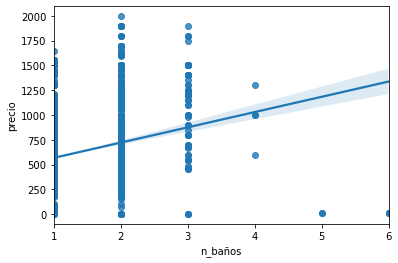

In [18]:
sns.regplot(x='n_baños', y='precio', data=df[(df['precio']<2000)& (df['n_baños'] < 60)])